In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from scipy.stats import kstest, mannwhitneyu
# import shap

from tqdm import tqdm

import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
file_path = "C:/Users/shrra/Downloads/MASH biomarkers clinical data.csv"
df = pd.read_csv(file_path)
print(df.columns)


Index(['ID', 'MASH', 'Age (yrs.)', 'Female n(%)', 'Hispanic race/ethnicity',
       'BMI (kg/m2)', 'BMI z-score', 'WC (cm)', 'ALT (U/L)', 'AST (U/L)',
       'Glucose (mg/dL)', 'Insulin (uU/mL)', 'HOMA-IR', 'TG:HDL ratio',
       'TG (mg/dL)', 'TC (mg/dL)', 'LDL-c (mg/dL)', 'HDL-c (mg/dL)',
       'Bilirubin (mg/dL)', 'Creatinine (mg/dL)', 'Albumin (g/dL)',
       'Alk phos (U/L)', 'SBP', 'DBP'],
      dtype='object')


In [3]:
excluded_cols = ["ID", "MASH"]
without_meadian_df = pd.read_csv(file_path)
with_meadian_df = pd.read_csv(file_path)

medians = with_meadian_df.loc[:, with_meadian_df.columns != 'ID'].median()
with_meadian_df  = with_meadian_df.fillna(medians)

# Choose either "without_meadian_df" or "with_meadian_df"

df = without_meadian_df



XGB Model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

def train_and_evaluate_xgb_model(df, excluded_cols):

    
    # Preprocessing
    x = df.drop(columns=excluded_cols)
    y = df['MASH']
    
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    # Model training
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", max_depth=5, n_estimators=200, learning_rate=0.1)
    xgb_model.fit(x_train, y_train)
    
    # Prediction
    y_pred = xgb_model.predict(x_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Accuracy: ", accuracy * 100)


train_and_evaluate_xgb_model(df, excluded_cols)



Accuracy:  69.49152542372882


In [5]:
# Auroc and confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import xgboost as xgb

def train_and_evaluate_xgb_model1(df, excluded_cols):

    
    # Preprocessing
    x = df.drop(columns=excluded_cols)
    y = df['MASH']
    
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    # Model training
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", max_depth=8, n_estimators=200, learning_rate=0.005)
    xgb_model.fit(x_train, y_train)
    
    # Predicting class labels
    y_pred = xgb_model.predict(x_test)
    
    # Predicting probabilities
    y_probs = xgb_model.predict_proba(x_test)[:, 1]  # Get the probabilities for the positive class

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_probs)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy * 100)
    print("AUROC: ", auroc)
    print("Confusion Matrix:\n", cm)

train_and_evaluate_xgb_model1(df, excluded_cols)

Accuracy:  73.72881355932203
AUROC:  0.7914728682170542
Confusion Matrix:
 [[23 20]
 [11 64]]


Catboost models

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor

def train_and_evaluate_catboost_model(df, excluded_cols, model_type='classifier'):

    # Preprocessing
    X = df.drop(columns=excluded_cols)
    y = df['MASH']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    if model_type == 'classifier':
        # Creating and training the CatBoost classifier
        catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=2, loss_function='MultiClass')
        catboost_classifier.fit(X_train, y_train)
        
        # Evaluating the classifier
        accuracy = catboost_classifier.score(X_test, y_test)
        print("Accuracy:", accuracy)
    
    elif model_type == 'regressor':
        # Creating and training the CatBoost regressor
        catboost_regressor = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')
        catboost_regressor.fit(X_train, y_train)
        
        # Evaluating the regressor
        mse = catboost_regressor.score(X_test, y_test)
        print("Mean Squared Error:", mse)
    
    else:
        print("Invalid model type. Please specify 'classifier' or 'regressor'.")



# Classifier
train_and_evaluate_catboost_model(df, excluded_cols, model_type='classifier')


0:	learn: 0.6750405	total: 99ms	remaining: 9.8s
1:	learn: 0.6625504	total: 99.6ms	remaining: 4.88s
2:	learn: 0.6509125	total: 100ms	remaining: 3.24s
3:	learn: 0.6424831	total: 101ms	remaining: 2.41s
4:	learn: 0.6350849	total: 101ms	remaining: 1.92s
5:	learn: 0.6237663	total: 101ms	remaining: 1.59s
6:	learn: 0.6146523	total: 102ms	remaining: 1.35s
7:	learn: 0.6088267	total: 102ms	remaining: 1.17s
8:	learn: 0.6067821	total: 102ms	remaining: 1.03s
9:	learn: 0.5967593	total: 103ms	remaining: 924ms
10:	learn: 0.5898172	total: 103ms	remaining: 834ms
11:	learn: 0.5845904	total: 104ms	remaining: 760ms
12:	learn: 0.5807430	total: 104ms	remaining: 698ms
13:	learn: 0.5749891	total: 105ms	remaining: 644ms
14:	learn: 0.5729238	total: 106ms	remaining: 598ms
15:	learn: 0.5708068	total: 106ms	remaining: 557ms
16:	learn: 0.5690840	total: 107ms	remaining: 523ms
17:	learn: 0.5640126	total: 108ms	remaining: 490ms
18:	learn: 0.5615556	total: 108ms	remaining: 460ms
19:	learn: 0.5602734	total: 108ms	remainin

In [8]:
# For Regressor
train_and_evaluate_catboost_model(df, excluded_cols, model_type='regressor')

0:	learn: 0.4845849	total: 2.33ms	remaining: 231ms
1:	learn: 0.4759160	total: 3.4ms	remaining: 167ms
2:	learn: 0.4665120	total: 4.68ms	remaining: 151ms
3:	learn: 0.4573434	total: 5.96ms	remaining: 143ms
4:	learn: 0.4489470	total: 6.98ms	remaining: 133ms
5:	learn: 0.4424321	total: 8.16ms	remaining: 128ms
6:	learn: 0.4373884	total: 9.48ms	remaining: 126ms
7:	learn: 0.4332931	total: 10.7ms	remaining: 123ms
8:	learn: 0.4288494	total: 11.8ms	remaining: 119ms
9:	learn: 0.4255417	total: 13.2ms	remaining: 118ms
10:	learn: 0.4223615	total: 14.4ms	remaining: 117ms
11:	learn: 0.4179184	total: 15.6ms	remaining: 114ms
12:	learn: 0.4134390	total: 16.8ms	remaining: 112ms
13:	learn: 0.4096227	total: 17.9ms	remaining: 110ms
14:	learn: 0.4050482	total: 19.1ms	remaining: 108ms
15:	learn: 0.4010946	total: 20.4ms	remaining: 107ms
16:	learn: 0.3989934	total: 21.5ms	remaining: 105ms
17:	learn: 0.3964009	total: 22.8ms	remaining: 104ms
18:	learn: 0.3929190	total: 24ms	remaining: 102ms
19:	learn: 0.3905603	tota

In [9]:
# AUROC + confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier, CatBoostRegressor

def train_and_evaluate_catboost_model1(df, excluded_cols, model_type='classifier'):

    # Preprocessing
    X = df.drop(columns=excluded_cols)
    y = df['MASH']
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    if model_type == 'classifier':
        # Creating and training the CatBoost classifier
        catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=2, loss_function='MultiClass', verbose=0)
        catboost_classifier.fit(X_train, y_train)
        
        # Predicting labels on the test set
        y_pred = catboost_classifier.predict(X_test)

        # Generating and printing confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Predicting probabilities on the test set for AUROC
        probs = catboost_classifier.predict_proba(X_test)[:, 1]  # Adjust if your scenario is multi-class
        auroc = roc_auc_score(y_test, probs)
        print("AUROC:", auroc)
    
    elif model_type == 'regressor':
        # Creating and training the CatBoost regressor
        catboost_regressor = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE', verbose=0)
        catboost_regressor.fit(X_train, y_train)
        
        # Evaluating the regressor using R^2
        r2 = catboost_regressor.score(X_test, y_test)
        print("R^2 Score:", r2)
    
    else:
        print("Invalid model type. Please specify 'classifier' or 'regressor'.")




In [10]:
train_and_evaluate_catboost_model1(df, excluded_cols, model_type='classifier')

Confusion Matrix:
[[27 16]
 [12 63]]
AUROC: 0.8182945736434108


In [11]:
train_and_evaluate_catboost_model1(df, excluded_cols, model_type='regressor')

R^2 Score: 0.22574951688288047


LightGBM Trial

From here manual

In [12]:
# Creating new df for Lightgbm model and latering column names to avoid special characters

# Use either "with_meadian_df" or "without_meadian_df" below

lightgbm_df = without_meadian_df

In [13]:
lightgbm_df = lightgbm_df.rename(columns={'BMI (kg/m2)': 'BMI'})
lightgbm_df = lightgbm_df.rename(columns={'BMI z-score': 'BMIzscore'})

lightgbm_df.columns = lightgbm_df.columns.str.replace(' ', '_')
lightgbm_df.columns = [col.split('_')[0] for col in lightgbm_df.columns]

lightgbm_df.columns = lightgbm_df.columns.str.replace(' ', '_').str.replace(r'[^\w\s]', '')

lightgbm_df = lightgbm_df.rename(columns={'HOMA-IR': 'HOMAIR'})
lightgbm_df = lightgbm_df.rename(columns={'LDL-c': 'LDLc'})
lightgbm_df = lightgbm_df.rename(columns={'HDL-c': 'HDLc'})
lightgbm_df = lightgbm_df.rename(columns={'TG:HDL': 'TGHDL'})
lightgbm_df.columns = lightgbm_df.columns.str.lower()

In [14]:
# Importing necessary libraries
import lightgbm as lgb
from sklearn.model_selection import train_test_split


excluded_cols = ["id","mash"]
x= lightgbm_df.drop(columns=excluded_cols)
y= lightgbm_df['mash']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Creating and training the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=100)
lgb_classifier.fit(X_train, y_train)

# Evaluating the model
accuracy = lgb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)



[LightGBM] [Info] Number of positive: 265, number of negative: 204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 469, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565032 -> initscore=0.261610
[LightGBM] [Info] Start training from score 0.261610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Shap for Lightgbm classifier

c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


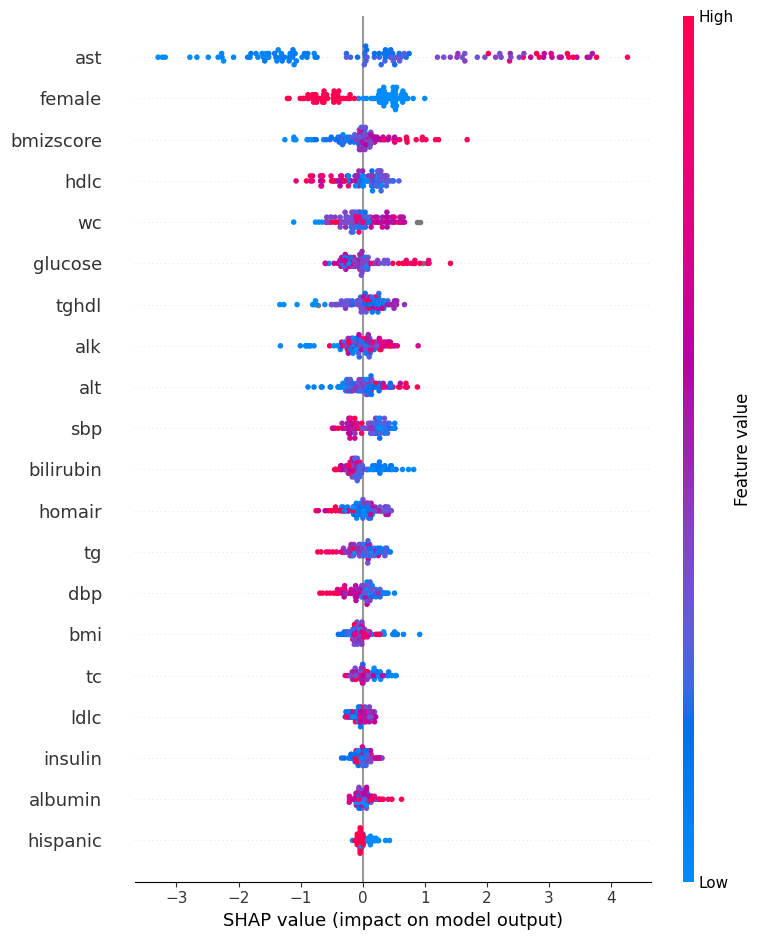

In [15]:
import shap
explainer = shap.TreeExplainer(lgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



In [16]:
X_reg= lightgbm_df.drop(columns=excluded_cols)
y_reg = lightgbm_df['mash']

# Splitting the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

# Creating and training the LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100)
lgb_regressor.fit(X_train_reg, y_train_reg)

# Evaluating the model
mse = lgb_regressor.score(X_test_reg, y_test_reg)
print("Mean Squared Error:", mse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 469, number of used features: 22
[LightGBM] [Info] Start training from score 0.565032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

KS test

In [17]:
# Use either "with_meadian_df" or "without_meadian_df" below


KSTest_df = without_meadian_df


excluded_cols = ["ID"]
KSTest_df= KSTest_df.drop(columns=excluded_cols)


print(KSTest_df.columns)

Index(['MASH', 'Age (yrs.)', 'Female n(%)', 'Hispanic race/ethnicity',
       'BMI (kg/m2)', 'BMI z-score', 'WC (cm)', 'ALT (U/L)', 'AST (U/L)',
       'Glucose (mg/dL)', 'Insulin (uU/mL)', 'HOMA-IR', 'TG:HDL ratio',
       'TG (mg/dL)', 'TC (mg/dL)', 'LDL-c (mg/dL)', 'HDL-c (mg/dL)',
       'Bilirubin (mg/dL)', 'Creatinine (mg/dL)', 'Albumin (g/dL)',
       'Alk phos (U/L)', 'SBP', 'DBP'],
      dtype='object')


KS Test with Ranking

Column: Age (yrs.)
    KS Stat: 0.118980709692784
    KS p-value: 0.03134953782561689
    KS Significant? True

    MannWhitU Stat Normalized: 0.4436711121695642
    MannWhitU p-value: 0.01909397606904675
    MannWhitU Significant? True



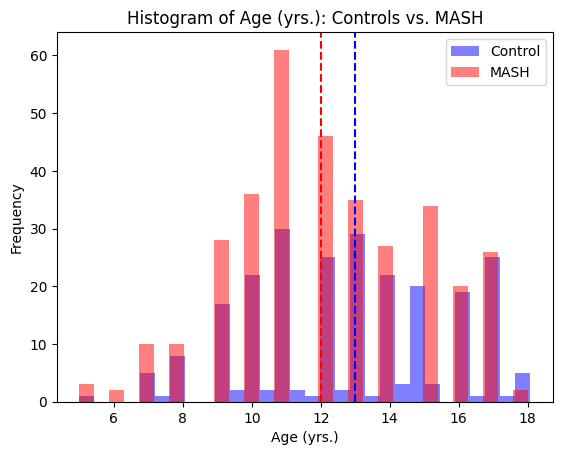

Column: Female n(%)
    KS Stat: 0.1954512979280781
    KS p-value: 2.8778065392291047e-05
    KS Significant? True

    MannWhitU Stat Normalized: 0.40227435103596093
    MannWhitU p-value: 2.3730836702455803e-06
    MannWhitU Significant? True



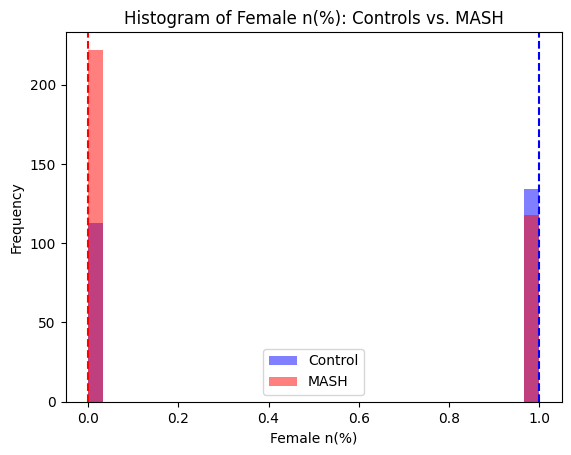

Column: Hispanic race/ethnicity
    KS Stat: 0.06983805668016195
    KS p-value: 0.4610446543359117
    KS Significant? False

    MannWhitU Stat Normalized: 0.534919028340081
    MannWhitU p-value: 0.06291595879605608
    MannWhitU Significant? False



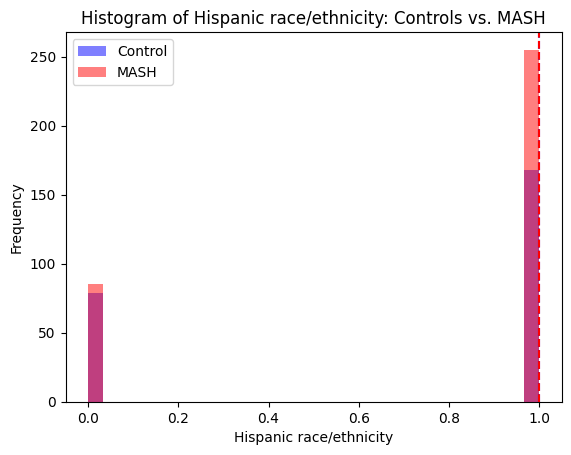

Column: BMI (kg/m2)
    KS Stat: 0.09184600669536107
    KS p-value: 0.16630885923605485
    KS Significant? False

    MannWhitU Stat Normalized: 0.5448708751793401
    MannWhitU p-value: 0.06357100993966645
    MannWhitU Significant? False



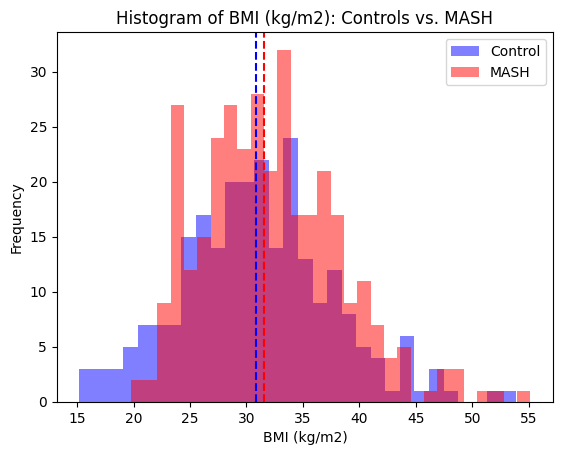

Column: BMI z-score
    KS Stat: 0.13402678144428504
    KS p-value: 0.0104942698261862
    KS Significant? True

    MannWhitU Stat Normalized: 0.5923242467718794
    MannWhitU p-value: 0.00013487230559574163
    MannWhitU Significant? True



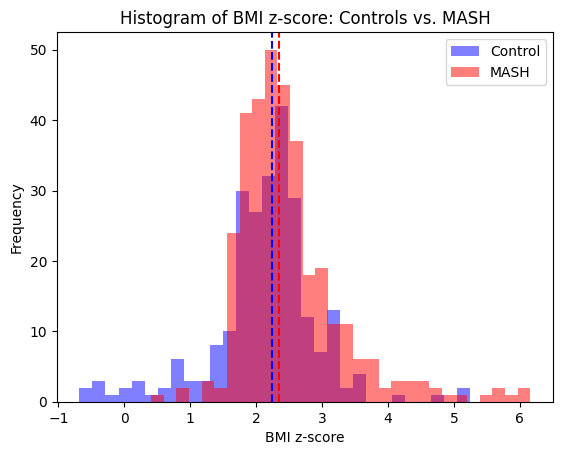

Column: WC (cm)
    KS Stat: 0.0932768609123217
    KS p-value: 0.15689954198896733
    KS Significant? False

    MannWhitU Stat Normalized: 0.5344067961637701
    MannWhitU p-value: 0.15644240764913012
    MannWhitU Significant? False



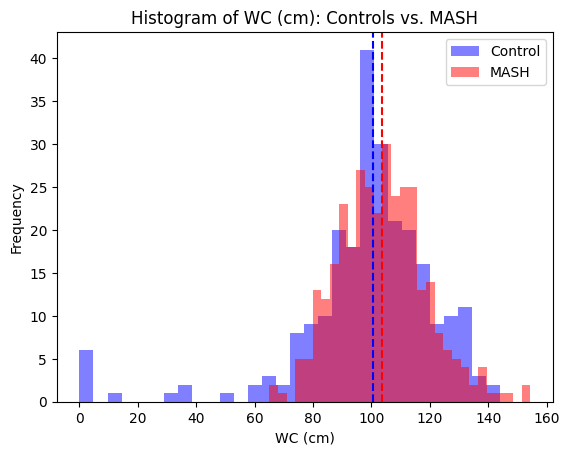

Column: ALT (U/L)
    KS Stat: 0.348371561013786
    KS p-value: 7.556060469233304e-16
    KS Significant? True

    MannWhitU Stat Normalized: 0.7447173559689363
    MannWhitU p-value: 5.4702203429897494e-24
    MannWhitU Significant? True



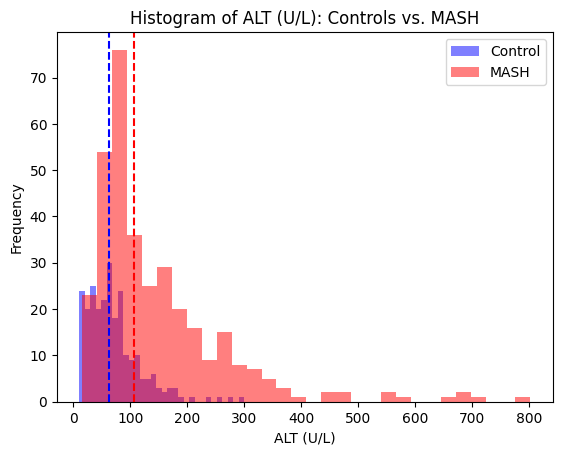

Column: AST (U/L)
    KS Stat: 0.4180672268907563
    KS p-value: 7.588343915752761e-23
    KS Significant? True

    MannWhitU Stat Normalized: 0.7681512605042017
    MannWhitU p-value: 1.6421835897759063e-28
    MannWhitU Significant? True



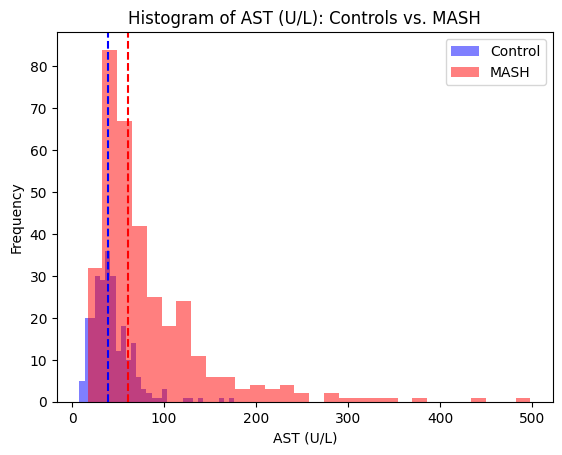

Column: Glucose (mg/dL)
    KS Stat: 0.09734212823746241
    KS p-value: 0.12543209116116474
    KS Significant? False

    MannWhitU Stat Normalized: 0.5385100397710738
    MannWhitU p-value: 0.11245954926248089
    MannWhitU Significant? False



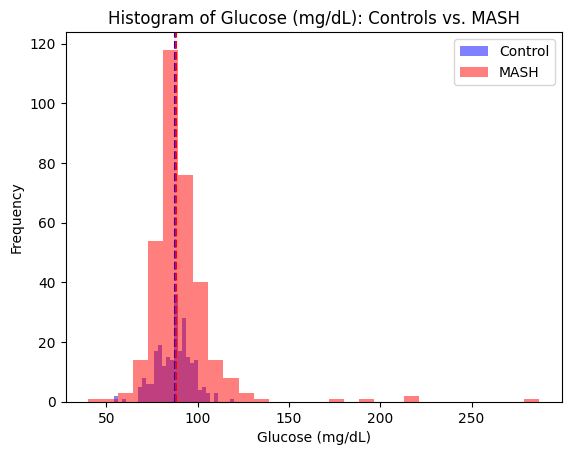

Column: Insulin (uU/mL)
    KS Stat: 0.16357927786499216
    KS p-value: 0.0008492530397337544
    KS Significant? True

    MannWhitU Stat Normalized: 0.5855572998430141
    MannWhitU p-value: 0.00041686667060177957
    MannWhitU Significant? True



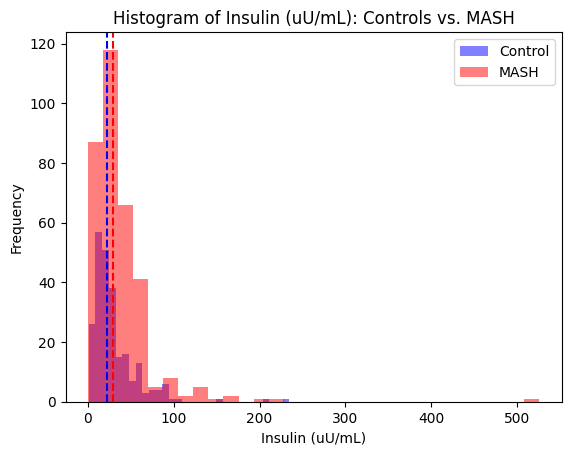

Column: HOMA-IR
    KS Stat: 0.17068360032712754
    KS p-value: 0.0004211031419079468
    KS Significant? True

    MannWhitU Stat Normalized: 0.5966649829220185
    MannWhitU p-value: 6.554230117918495e-05
    MannWhitU Significant? True



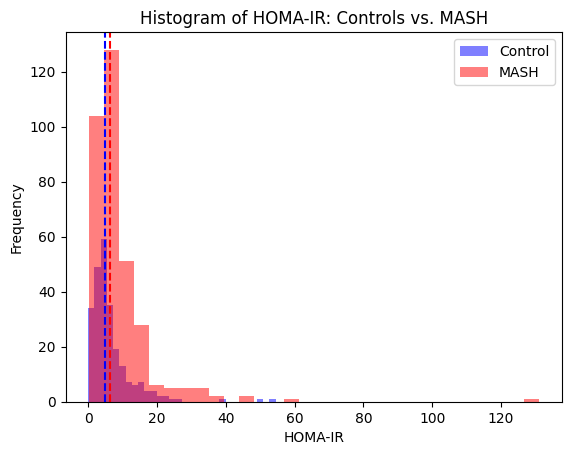

Column: TG:HDL ratio
    KS Stat: 0.127340188185081
    KS p-value: 0.018005440280023002
    KS Significant? True

    MannWhitU Stat Normalized: 0.5593595402075856
    MannWhitU p-value: 0.014467752838226938
    MannWhitU Significant? True



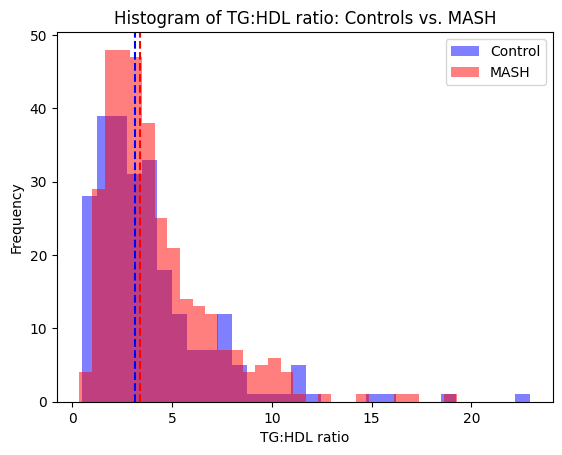

Column: TG (mg/dL)
    KS Stat: 0.10192550198855369
    KS p-value: 0.0964156923020622
    KS Significant? False

    MannWhitU Stat Normalized: 0.5491318265593171
    MannWhitU p-value: 0.04296138117698161
    MannWhitU Significant? True



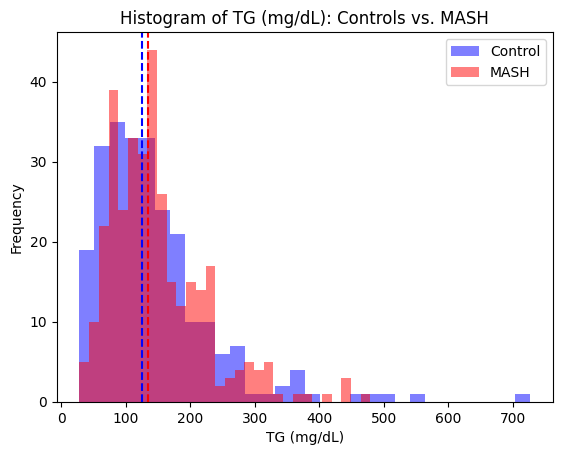

Column: TC (mg/dL)
    KS Stat: 0.08157920263847124
    KS p-value: 0.2824102391703934
    KS Significant? False

    MannWhitU Stat Normalized: 0.5272759239499466
    MannWhitU p-value: 0.26117911192832943
    MannWhitU Significant? False



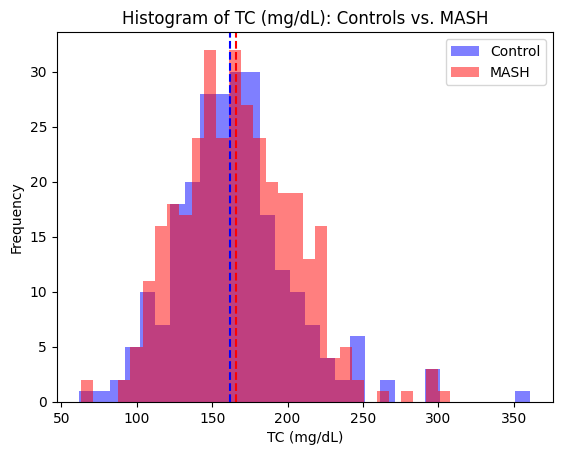

Column: LDL-c (mg/dL)
    KS Stat: 0.05737073570700922
    KS p-value: 0.7174464466620462
    KS Significant? False

    MannWhitU Stat Normalized: 0.5224985713220861
    MannWhitU p-value: 0.35697232326773676
    MannWhitU Significant? False



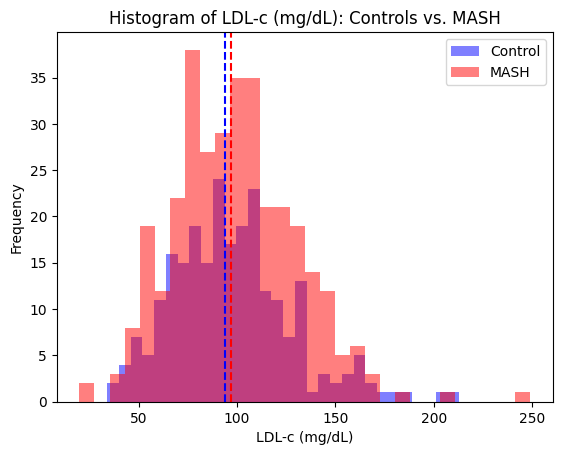

Column: HDL-c (mg/dL)
    KS Stat: 0.11344456300320109
    KS p-value: 0.04719328738241851
    KS Significant? True

    MannWhitU Stat Normalized: 0.44176811523911147
    MannWhitU p-value: 0.016374176304448717
    MannWhitU Significant? True



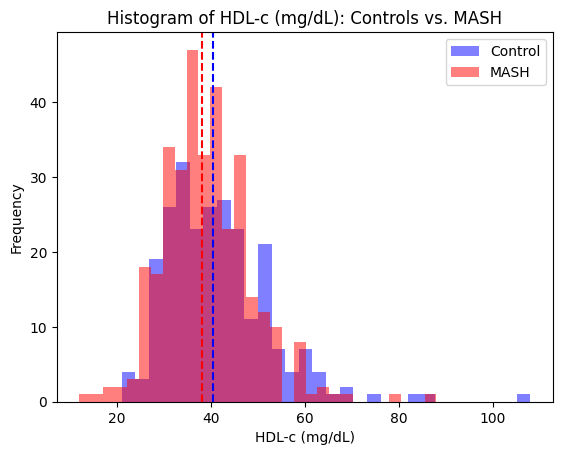

Column: Bilirubin (mg/dL)
    KS Stat: 0.0645858343337335
    KS p-value: 0.5640188390725359
    KS Significant? False

    MannWhitU Stat Normalized: 0.4640096038415366
    MannWhitU p-value: 0.13273890503077995
    MannWhitU Significant? False



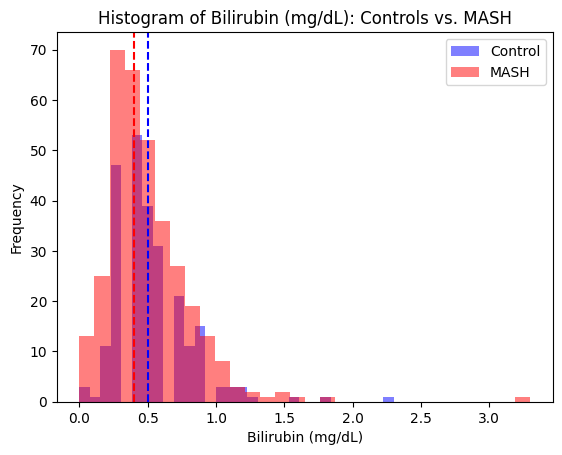

Column: Creatinine (mg/dL)
    KS Stat: 0.11300813008130081
    KS p-value: 0.047301597537389765
    KS Significant? True

    MannWhitU Stat Normalized: 0.4409014825442372
    MannWhitU p-value: 0.012114556628110897
    MannWhitU Significant? True



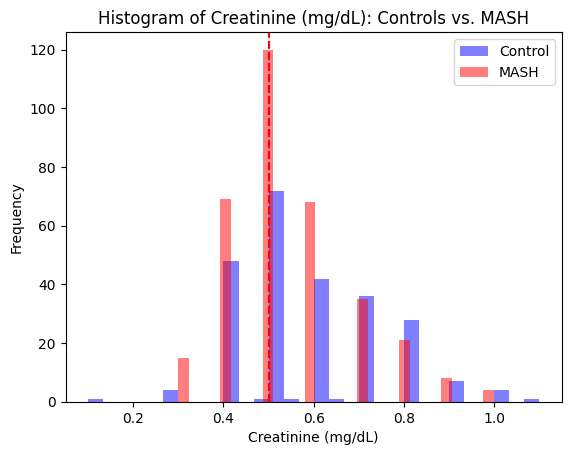

Column: Albumin (g/dL)
    KS Stat: 0.13804399808703968
    KS p-value: 0.0076498047854523495
    KS Significant? True

    MannWhitU Stat Normalized: 0.5873445719751316
    MannWhitU p-value: 0.0002871384436785331
    MannWhitU Significant? True



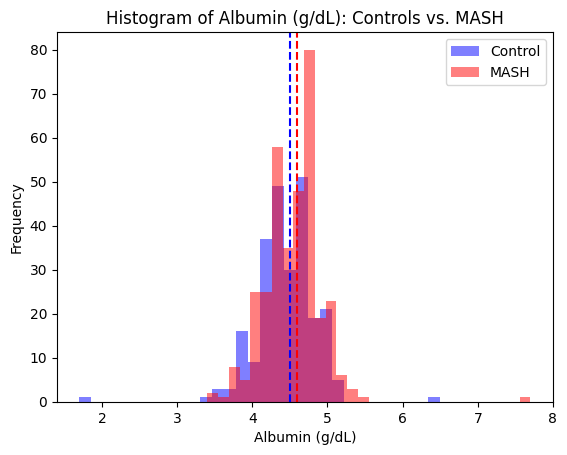

Column: Alk phos (U/L)
    KS Stat: 0.1221664275466284
    KS p-value: 0.02532670748907734
    KS Significant? True

    MannWhitU Stat Normalized: 0.5532460545193687
    MannWhitU p-value: 0.0276992971488746
    MannWhitU Significant? True



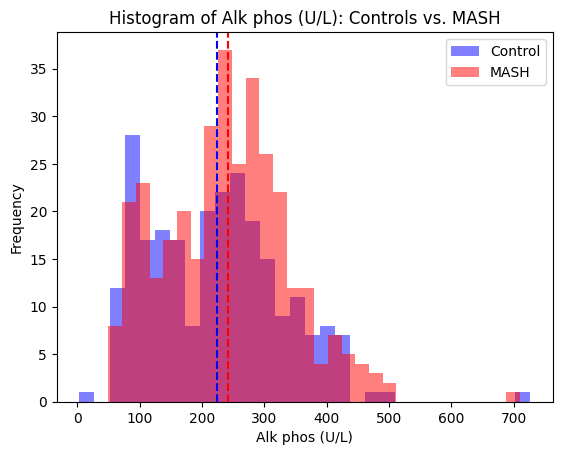

Column: SBP
    KS Stat: 0.08535307928481127
    KS p-value: 0.23387878661212635
    KS Significant? False

    MannWhitU Stat Normalized: 0.45982782493528385
    MannWhitU p-value: 0.09723781248267342
    MannWhitU Significant? False



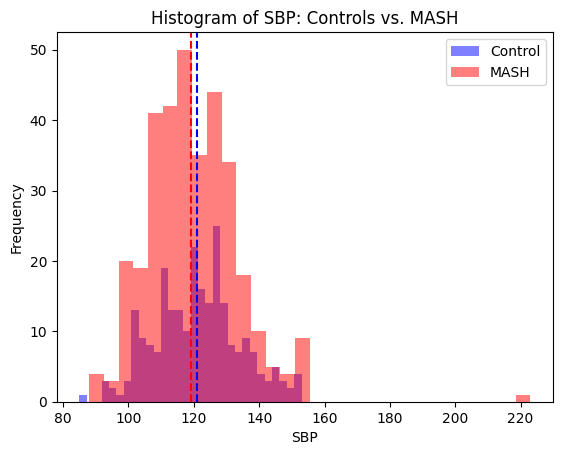

Column: DBP
    KS Stat: 0.04931671783757751
    KS p-value: 0.8570515513476976
    KS Significant? False

    MannWhitU Stat Normalized: 0.48469688760459934
    MannWhitU p-value: 0.5275308177278721
    MannWhitU Significant? False



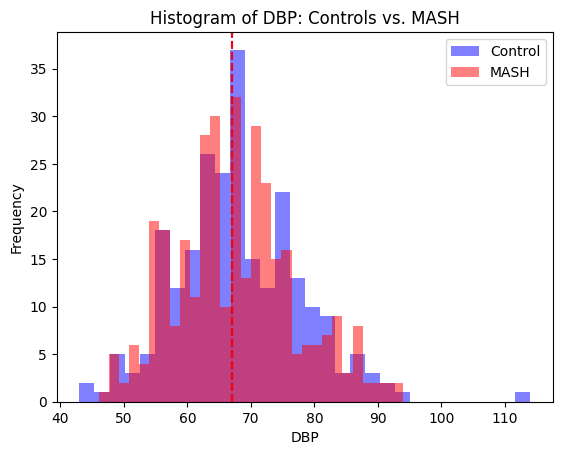

Feature: AST (U/L), KS Stat: 0.4180672268907563, KS p-value: 7.588343915752761e-23
Feature: ALT (U/L), KS Stat: 0.348371561013786, KS p-value: 7.556060469233304e-16
Feature: Female n(%), KS Stat: 0.1954512979280781, KS p-value: 2.8778065392291047e-05
Feature: HOMA-IR, KS Stat: 0.17068360032712754, KS p-value: 0.0004211031419079468
Feature: Insulin (uU/mL), KS Stat: 0.16357927786499216, KS p-value: 0.0008492530397337544
Feature: Albumin (g/dL), KS Stat: 0.13804399808703968, KS p-value: 0.0076498047854523495
Feature: BMI z-score, KS Stat: 0.13402678144428504, KS p-value: 0.0104942698261862
Feature: TG:HDL ratio, KS Stat: 0.127340188185081, KS p-value: 0.018005440280023002
Feature: Alk phos (U/L), KS Stat: 0.1221664275466284, KS p-value: 0.02532670748907734
Feature: Age (yrs.), KS Stat: 0.118980709692784, KS p-value: 0.03134953782561689
Feature: HDL-c (mg/dL), KS Stat: 0.11344456300320109, KS p-value: 0.04719328738241851
Feature: Creatinine (mg/dL), KS Stat: 0.11300813008130081, KS p-valu

[('AST (U/L)', 0.4180672268907563, 7.588343915752761e-23),
 ('ALT (U/L)', 0.348371561013786, 7.556060469233304e-16),
 ('Female n(%)', 0.1954512979280781, 2.8778065392291047e-05),
 ('HOMA-IR', 0.17068360032712754, 0.0004211031419079468),
 ('Insulin (uU/mL)', 0.16357927786499216, 0.0008492530397337544),
 ('Albumin (g/dL)', 0.13804399808703968, 0.0076498047854523495),
 ('BMI z-score', 0.13402678144428504, 0.0104942698261862),
 ('TG:HDL ratio', 0.127340188185081, 0.018005440280023002),
 ('Alk phos (U/L)', 0.1221664275466284, 0.02532670748907734),
 ('Age (yrs.)', 0.118980709692784, 0.03134953782561689),
 ('HDL-c (mg/dL)', 0.11344456300320109, 0.04719328738241851),
 ('Creatinine (mg/dL)', 0.11300813008130081, 0.047301597537389765),
 ('TG (mg/dL)', 0.10192550198855369, 0.0964156923020622),
 ('Glucose (mg/dL)', 0.09734212823746241, 0.12543209116116474),
 ('WC (cm)', 0.0932768609123217, 0.15689954198896733),
 ('BMI (kg/m2)', 0.09184600669536107, 0.16630885923605485),
 ('SBP', 0.0853530792848112

In [20]:

def perform_ks_test_ranking(KSTest_df):
    target_column = 'MASH'
    feature_importance = []

    for col in KSTest_df.columns:
        if col != target_column:
            Controls = KSTest_df[KSTest_df[target_column] == 0][col].dropna()
            MASH = KSTest_df[KSTest_df[target_column] == 1][col].dropna()

            ks_stat, ks_p_value = kstest(MASH, Controls)
            U_stat, U_p_value = mannwhitneyu(MASH, Controls)
            U_stat_norm = U_stat / (len(MASH) * len(Controls))
            
            feature_importance.append((col, ks_stat, ks_p_value))
            
            print(f'Column: {col}')
            print(f'    KS Stat: {ks_stat}')
            print(f'    KS p-value: {ks_p_value}')
            print(f'    KS Significant? {ks_p_value < 0.05}\n')
            print(f'    MannWhitU Stat Normalized: {U_stat_norm}')
            print(f'    MannWhitU p-value: {U_p_value}')
            print(f'    MannWhitU Significant? {U_p_value < 0.05}\n')
            
            # Plotting
            plt.hist(Controls, bins=30, alpha=0.5, color='blue', label='Control')
            plt.hist(MASH, bins=30, alpha=0.5, color='red', label='MASH')
            plt.xlabel(f'{col}')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {col}: Controls vs. MASH')
            plt.legend()
            plt.axvline(np.median(Controls), color='blue', linestyle='--', label='Control Median')
            plt.axvline(np.median(MASH), color='red', linestyle='--', label='MASH Median')
            plt.show()

    # Sorting features by KS statistic in descending order
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    # Print or return sorted list
    for feature in feature_importance:
        print(f'Feature: {feature[0]}, KS Stat: {feature[1]}, KS p-value: {feature[2]}')

    return feature_importance

perform_ks_test_ranking(KSTest_df)